In [4]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns

% matplotlib inline
% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","31,32,33,34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15","17,18",1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32","34,35",1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [7]:
cd /data

/data


In [8]:
data['Ptl_note'].value_counts()

50Hz EI high freq        12
50Hz EI preonly          12
E_I_2Hz_associative      12
E_I_2Hz_Associ_AM251     11
EI_low high              10
EI_antihebbian           10
50Hz EI postonly         10
50Hz IE postonly          9
50Hz IE preonly           9
50Hz IE high freq         8
No ptl                    7
E_I_2Hz_POST_AM251        7
E_I_preonly_low           7
E_I_50Hz_Associ_AM251     6
 Naspm 100 uM             5
50Hz II high freq         5
EI_high_low               5
IE_high low               4
IE_high_low               4
E_i_postsynapti_low       4
Naspm 100 uM              2
E_I_postsynapti_low       2
pre only after Naspm      1
50 hZ II preonly          1
-67.5                     1
50 Hz II preonly          1
Name: Ptl_note, dtype: int64

In [9]:
data_post_50Hz_reci = data[(data['Ptl_note']=='50Hz EI postonly')&(data['Reci']==1)]
data_post_50Hz_uni = data[(data['Ptl_note']=='50Hz EI postonly')&(data['Reci']==0)]

In [10]:
data_post_50Hz_reci

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
35,2017032402,27,2,1,1,0,2,"9,10","12,13",4,16,Weak LTD,50Hz EI postonly
36,2017032701,30,1,1,1,0,2,"5,6,10,11","14,15,16,17,19,20,21",4,19,Strong LTD,50Hz EI postonly
37,2017032802,31,1,1,1,0,2,15,"17,18",4,7,"Weak LTD, no change on Rin",50Hz EI postonly
38,2017032905,32,2,1,1,0,2,"5,6",8,4,15,"No change, potential LTP",50Hz EI postonly
39,2017053102,34,2,1,1,0,1,7,"9,10,11,12",4,4,No change,50Hz EI postonly


In [11]:
data_post_50Hz_uni

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
30,2017032401,27,2,1,0,0,2,"5,6,7","9,10",4,13,Strong LTD,50Hz EI postonly
31,2017032803,31,1,1,0,0,2,8,"10,12,13,14",4,0,"Weak LTD,no change on Rin",50Hz EI postonly
32,2017062304,25,1,1,0,0,1,"13,14,15,16","18, 19,20,21,22",4,0,"Strong LTD, careful analysis needed",50Hz EI postonly
33,2017062701,23,1,1,0,0,1,28,"30,31",4,0,Strong LTD,50Hz EI postonly
34,2017060803,31,1,1,0,0,1,"13,14",16,4,0,Strong LTD,50Hz EI postonly


/src/Patch_ana/Patch_ana/patch_pip.py:249: RuntimeWarning: invalid value encountered in double_scalars
  output['PPR'] = output['resp2_amp'] / output['resp1_amp']
/src/Patch_ana/Patch_ana/patch_pip.py:83: RuntimeWarning: divide by zero encountered in double_scalars
  ir = 0.005 / np.mean(trial_demean[ir_region]) * 1e-6 - 20


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


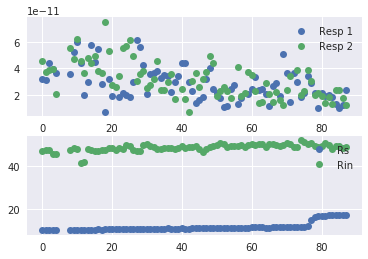

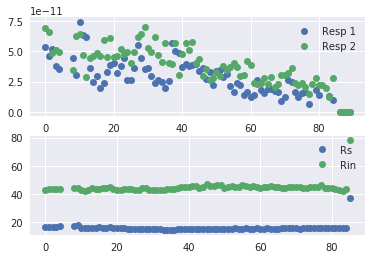

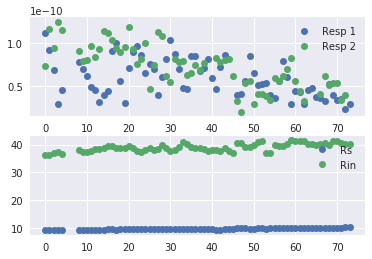

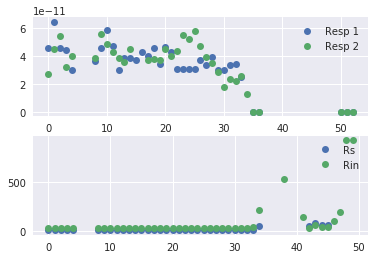

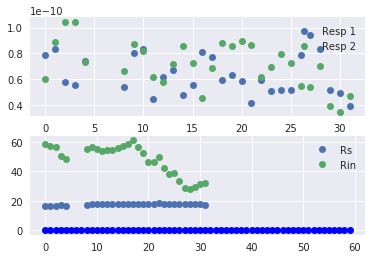

In [13]:
patch_pip.df_ana(data_post_50Hz_reci,'data_post_50Hz_reci')
post_50Hz_reci = pd.read_pickle('data_post_50Hz_reci')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(post_50Hz_reci)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [14]:
post_50Hz_reci = pd.read_pickle('/data/data_post_50Hz_reci')

In [15]:
elimi = np.array([60,60,60,32,30])
elimi_sr = pd.Series(elimi, index=post_50Hz_reci.index)
post_50Hz_reci['elimi']=elimi_sr

In [16]:
# joint_sr = pd.Series(joint_sr, index=post_50Hz_reci.index)
post_50Hz_reci.to_pickle('/data/ana_post_50Hz_reci')

<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


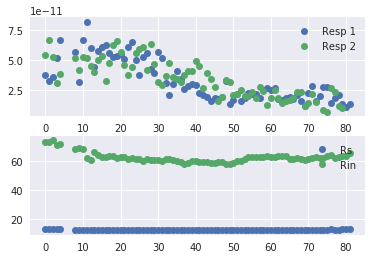

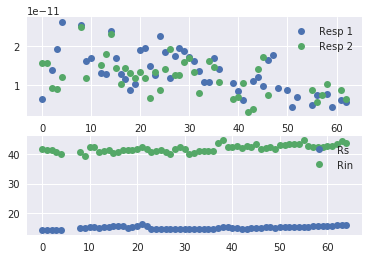

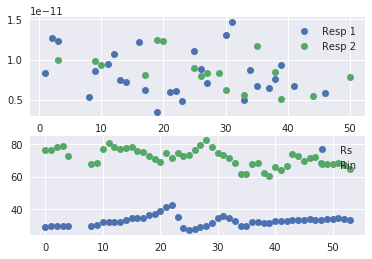

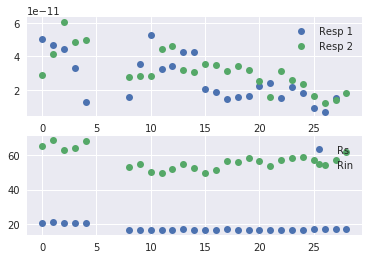

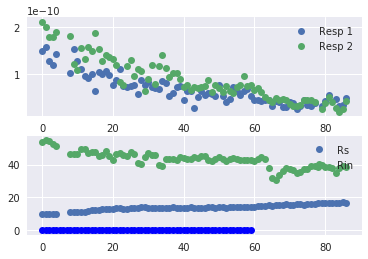

In [20]:
patch_pip.df_ana(data_post_50Hz_uni,'data_post_50Hz_uni')
post_50Hz_uni = pd.read_pickle('data_post_50Hz_uni')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(post_50Hz_uni)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [21]:
post_50Hz_uni = pd.read_pickle('/data/data_post_50Hz_uni')

In [22]:
elimi = np.array([70,50,45,25,50])
elimi_sr = pd.Series(elimi, index=post_50Hz_reci.index)
post_50Hz_reci['elimi']=elimi_sr

In [23]:
# joint_sr = pd.Series(joint_sr, index=post_50Hz_reci.index)
post_50Hz_reci.to_pickle('/data/ana_post_50Hz_reci')